In [1]:
import nibabel as nib
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import cv2

In [2]:
df = pd.read_csv('labels.csv')
df = np.array(df['TypeOfTB'])

In [3]:
unique, count = np.unique(df, return_counts=True)
count = np.round(count/917, 2)
qty_per_type = dict(zip(unique, count))

# Analisis of types of TB in dataset

In [4]:
tb_types = ['Infiltrative', 'Focal', 'Tuberculoma', 'Military', 'Fibro-cavernous']
data = {'Amount': qty_per_type.values()}
pd.DataFrame.from_dict(data, orient='index', columns = tb_types).transpose()

,Amount
Infiltrative,0.46
Focal,0.25
Tuberculoma,0.11
Military,0.11
Fibro-cavernous,0.08


In [5]:
source = pd.DataFrame({
    'Type of TB': tb_types,
    '% of the cases': list(qty_per_type.values())
})

bars = alt.Chart(source, title = 'Distribution of types of TB').mark_bar(size = 60).encode(
    x= alt.X('Type of TB', sort=alt.EncodingSortField(field="N° of Cases", op="count", order='ascending')),
    y= alt.Y('% of the cases')
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='% of the cases'
)

(bars + text).properties(width = 400, height = 400).configure_title(fontSize=24)

alt.LayerChart(...)

In [6]:
# Load Image
img = nib.load('images_1/TRN_0001.nii.gz')
print(img.shape)

(512, 512, 128)


## CT-Scan Slices Images

(512, 512, 128)


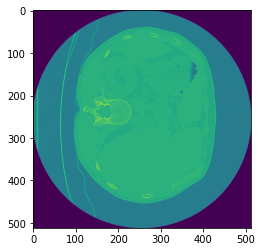

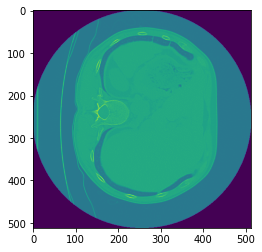

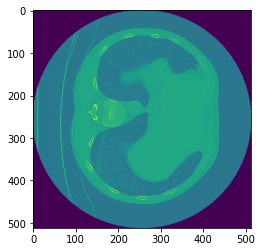

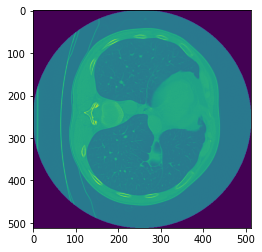

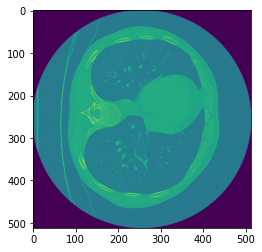

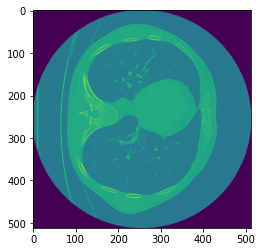

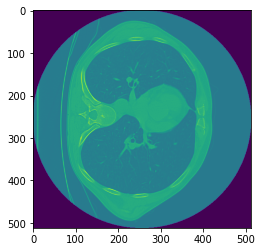

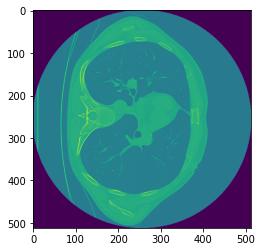

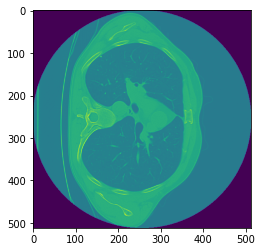

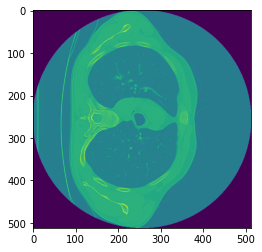

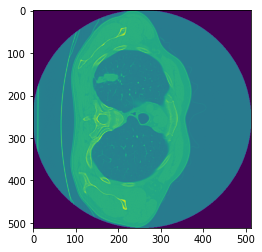

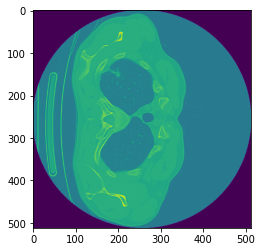

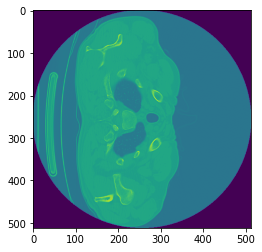

In [7]:
data = img.get_fdata()
print(data.shape)

if(len(data.shape)==3):
    for slice_Number in range(0, data.shape[2], 10):
        plt.imshow(data[:,:,slice_Number ])
        plt.show()

In [8]:
# Example images of each type
infiltrative_ex = 'images_1/TRN_0001.nii.gz'
focal_ex = 'images_1/TRN_0088.nii.gz'
tuberculoma_ex = 'images_1/TRN_0077.nii.gz'
military_ex = 'images_1/TRN_0007.nii.gz'
fibro_cav_ex = 'images_1/TRN_0066.nii.gz'
examples_paths = [infiltrative_ex, focal_ex, tuberculoma_ex, military_ex, fibro_cav_ex]

## Create video of CT-Scan

In [9]:
# https://stackoverflow.com/questions/62880911/generate-video-from-numpy-arrays-with-opencv
PATH = 'images_1/TRN_0050.nii.gz'

img = nib.load(PATH)
data = img.get_fdata()

fps = 30
size = (512, 512)
out = cv2.VideoWriter('example.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (size[1], size[0]), False)
for i in range(data.shape[2]):
    
    data_slice = data[:, :, i]
    data_slice = data_slice.astype('uint8')
    out.write(data_slice)
    
out.release()

## Show video of CT-Scan

In [10]:
# https://github.com/bikz05/ipython-notebooks/blob/master/computer-vision/displaying-video-in-ipython-notebook.ipynb
videos = ['videos/infiltrative.mp4', 'videos/focal.mp4', 'videos/tuberculoma.mp4', 'videos/military.mp4', \
          'videos/fibro_cav.mp4']

# Select Type 0: Infiltrative, 1: Focal, 2: Tuberculoma, 3: Military, 4: Fibro Cavernous
type = 2 
#video = videos[type]
video = 'example.mp4'

from IPython import display
vid = cv2.VideoCapture(video)
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            print("Video End")
            break
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.axis('off')
        plt.title("CT-Scan")
        plt.imshow(frame)
        display.display(plt.show())
        display.clear_output(wait=True)
except KeyboardInterrupt:
    vid.release()
    print("Video Interrupted")

Video End


## Averaging over slices of CT

In [11]:
# Averaging across the layers of CT-Scan
images = [nib.load(path) for path in examples_paths]
types = {0: 'Infiltrative', 1: 'Focal', 2: 'Tuberculoma', 3: 'Military', 4: 'Fibro Cavernous'}
data = [img.get_fdata() for img in images]

average_imgs = [np.average(img_data, axis = 2) for img_data in data]

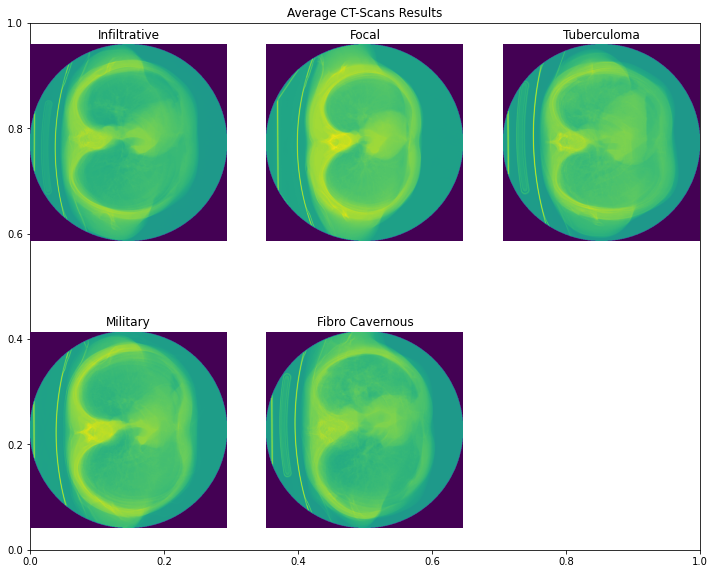

In [12]:
w = 512
h = 512
fig = plt.figure(figsize=(12, 12))
columns = 3
rows = 2

plt.title('Average CT-Scans Results')
for i in range(1, columns*rows):
    img = average_imgs[i - 1]
    fig_var = fig.add_subplot(rows, columns, i)
    fig_var.title.set_text(types[i - 1])
    fig_var.axis('off')
    plt.imshow(img)
plt.axis('off')
plt.subplots_adjust(bottom = 0.27)
plt.show()

## Masks of the lungs

In [13]:
# Example images of each type
infiltrative_ex = 'masks1/TRN_0001.nii.gz', 'masks2/TRN_0001.nii.gz' 
focal_ex = 'masks1/TRN_0088.nii.gz', 'masks2/TRN_0088.nii.gz'
tuberculoma_ex = 'masks1/TRN_0077.nii.gz', 'masks2/TRN_0077.nii.gz'
military_ex = 'masks1/TRN_0007.nii.gz', 'masks2/TRN_0007.nii.gz'
fibro_cav_ex = 'masks1/TRN_0066.nii.gz', 'masks2/TRN_0066.nii.gz'
examples_paths = [infiltrative_ex, focal_ex, tuberculoma_ex, military_ex, fibro_cav_ex]

In [14]:
images = [nib.load(path[0]) for path in examples_paths]
types = {0: 'Infiltrative', 1: 'Focal', 2: 'Tuberculoma', 3: 'Military', 4: 'Fibro Cavernous'}
data = [img.get_fdata() for img in images]

average_imgs = [np.average(img_data, axis = 2) for img_data in data]

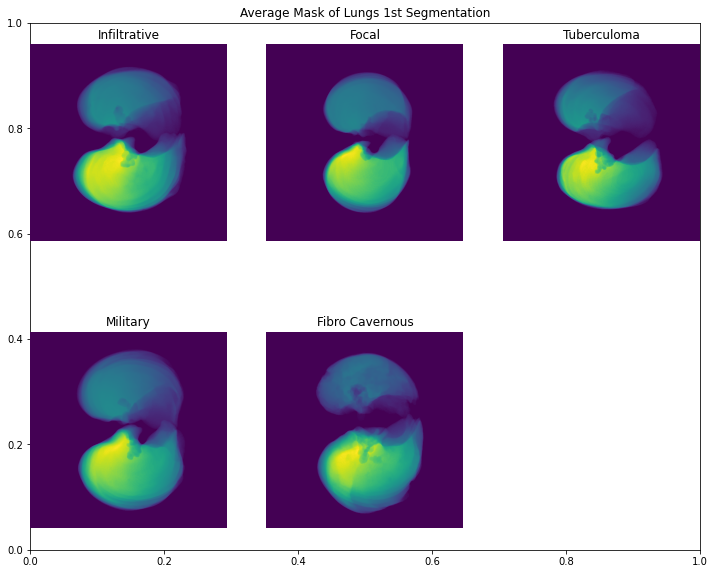

In [15]:
w = 512
h = 512
fig = plt.figure(figsize=(12, 12))
columns = 3
rows = 2

plt.title('Average Mask of Lungs 1st Segmentation')
for i in range(1, columns*rows):
    img = average_imgs[i - 1]
    fig_var = fig.add_subplot(rows, columns, i)
    fig_var.title.set_text(types[i - 1])
    fig_var.axis('off')
    plt.imshow(img)
plt.axis('off')
plt.subplots_adjust(bottom = 0.27)
plt.show()

In [16]:
images = [nib.load(path[1]) for path in examples_paths]
types = {0: 'Infiltrative', 1: 'Focal', 2: 'Tuberculoma', 3: 'Military', 4: 'Fibro Cavernous'}
data = [img.get_fdata() for img in images]

average_imgs = [np.average(img_data, axis = 2) for img_data in data]

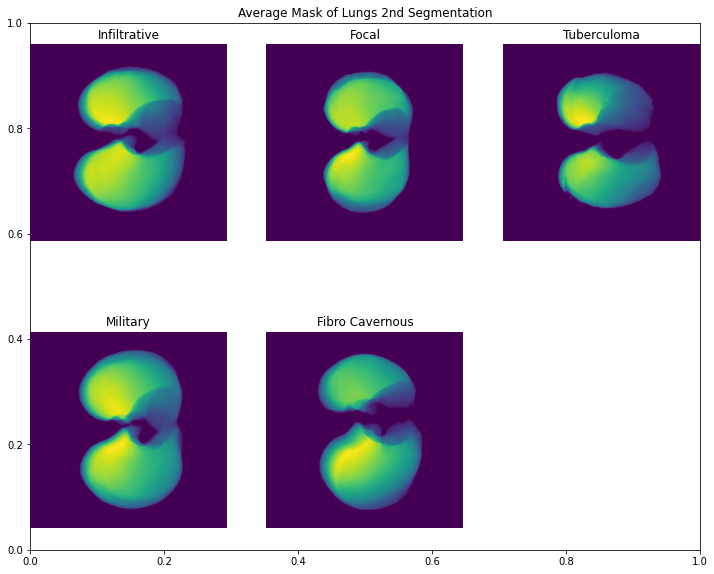

In [17]:
w = 512
h = 512
fig = plt.figure(figsize=(12, 12))
columns = 3
rows = 2

plt.title('Average Mask of Lungs 2nd Segmentation')
for i in range(1, columns*rows):
    img = average_imgs[i - 1]
    fig_var = fig.add_subplot(rows, columns, i)
    fig_var.title.set_text(types[i - 1])
    fig_var.axis('off')
    plt.imshow(img)
plt.axis('off')
plt.subplots_adjust(bottom = 0.27)
plt.show()